# Αναγνώριση προτύπων

* Χατζηθεοδώρου Ιάσων 03117089
* Κουνούδης Δημήτρης

## Εργαστήριο 1

### Προπαρασκευή

In [48]:
%matplotlib inline

import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

import numpy as np
import matplotlib.pyplot as plt
import sklearn, sklearn.metrics

import lib
import importlib

In [49]:
# Useful for reloading lib.py when it is changed
importlib.reload(lib)

<module 'lib' from '/home/jason/PatRec/Lab1/lib.py'>

#### Βήμα 1

In [50]:
def read_data_to_array(file):
  with open(file) as f:
    rawdata = f.readlines()
  data = [list(map(lambda x: float(x), row.split())) for row in rawdata]
  return np.array(data)

train = read_data_to_array('train.txt')
test = read_data_to_array('test.txt')

X_train = train[:, 1:]
X_test = test[:, 1:]
y_train = np.array([int(row[0]) for row in train])
y_test = np.array([int(row[0]) for row in test])

#### Βήμα 2

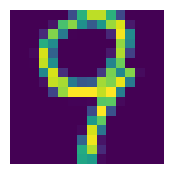

In [51]:
plt.figure(figsize = (2, 2))
lib.show_sample(X_train, 131)
plt.show()

#### Βήμα 3

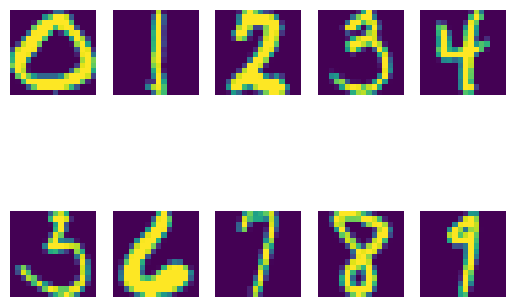

In [52]:
lib.plot_digits_samples(X_train, y_train)
plt.show()

#### Βήμα 4

In [53]:
lib.digit_mean_at_pixel(X_train, y_train, 0, (10, 10))

-0.5041884422110553

#### Βήμα 5

In [54]:
lib.digit_variance_at_pixel(X_train, y_train, 0, (10, 10))

0.5249618093885184

#### Βήμα 6

In [55]:
zero_mean = lib.digit_mean(X_train, y_train, 0)
zero_variance = lib.digit_variance(X_train, y_train, 0)

#print(list(zero_mean))
#print(list(zero_variance))


#### Βήμα 7

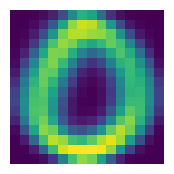

In [56]:
plt.figure(figsize = (2, 2))
plt.imshow(zero_mean.reshape((16, 16)))
plt.axis('off')
plt.show()

#### Βήμα 8

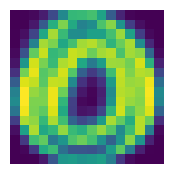

In [57]:
plt.figure(figsize = (2, 2))
plt.imshow(zero_variance.reshape((16, 16)))
plt.axis('off')
plt.show()

Παρατηρούμε ότι στην περίπτωση του variance διαχωρίζεται η γραμμή του ψηφίου 0 σε δύο μέρη. Αυτό συμβαίνει διότι τα περισσότερα δείγματα του συγκεκριμένου ψηφίου σε εκείνο το κομμάτι συμφωνούν άρα το variance είναι πολύ χαμηλό, ενώ αντίθετα διαφωνούν στο πού ακριβώς είναι τα όρια των γραμμών, για αυτό και είναι πιό έντονο το χρώμα εκεί που θα περιμέναμε να είναι το τέλος της γραμμής.

#### Βήμα 9

In [58]:
means = []
variances = []
for i in range(10):
    means.append(lib.digit_mean(X_train, y_train, i))
    variances.append(lib.digit_mean(X_train, y_train, i))

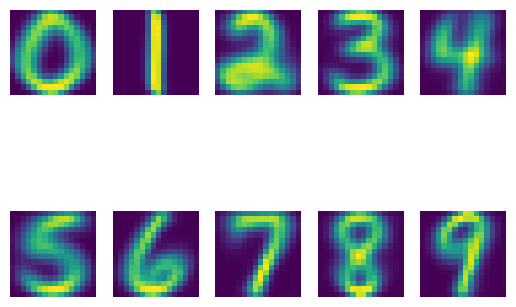

In [59]:
fig = plt.figure()

i = 1
for x in means:
    fig.add_subplot(2, 5, i)
    plt.imshow(x.reshape((16, 16)))
    plt.axis('off')
    i += 1

plt.show()

#### Βήμα 10

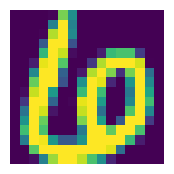

In [60]:
plt.figure(figsize = (2, 2))
lib.show_sample(X_test, 101)
plt.show()

In [61]:
print("The prediction is {}".format(lib.euclidean_distance_classifier(np.array(X_test[101]), means)[0]))
print("The correct answer is {}".format(y_test[101]))

The prediction is 4
The correct answer is 6


Το ψηφίο θα έπρεπε να αναγνωριστεί ως 6, όμως δεν είναι ξεκάθαρο ούτε σε άνθρωπο αυτό, επομένως είναι λογικό να αποτύχει ο euclidean classifier

#### Βήμα 11

In [62]:
predictions = lib.euclidean_distance_classifier(X_test, means)

print("The accuracy is {}".format(sklearn.metrics.accuracy_score(y_test, predictions)))

The accuracy is 0.8141504733432985


#### Βήμα 12

In [63]:
# The solution is in lib.py

#### Βήμα 13

In [64]:
# Concatenate all data in order to split them into folds
X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

# Evaluate classifier
score = lib.evaluate_euclidean_classifier(X, y, folds=5)

In [65]:
print("The 5-fold accuracy score of the classifier is {}".format(score))

The 5-fold accuracy score of the classifier is 0.8407163638677286


### Εργαστηριακό μέρος